## 2a>

In [9]:
import matplotlib.pyplot as plt
import os
import cv2
from pathlib import Path
from skimage.color import rgb2gray
from skimage import io, exposure
import xml.etree.ElementTree as ET
from PIL import Image

myBreeds = [
    'n02099712-Labrador_retriever',
    'n02110185-Siberian_husky',
    'n02113799-standard_poodle',
    'n02113186-Cardigan'
    ]

In [10]:
class AllRequiredPaths:
    myBreeds = [
    'n02099712-Labrador_retriever',
    'n02110185-Siberian_husky',
    'n02113799-standard_poodle',
    'n02113186-Cardigan'
    ]
    
    root_dir = ""
    imgs_folder = ""
    annotation_folder = ""
    imgs_folder_sub_folders = [f"images/{name}" for name in myBreeds]

    
    
    def __init__(self):
        self.root_dir = os.getcwd()
        self.imgs_folder = os.path.join(self.root_dir, "images")
        self.annotation_folder = os.path.join(self.root_dir, "Annotation")


class CropAndResizeImages:
    def __init__(self):
        self.all_paths = AllRequiredPaths()
    
    def _get_bbox(self, annot):
        xml = annot
        tree = ET.parse(xml)
        root = tree.getroot()
        objects = root.findall('object')
        bbox = []
        for o in objects:
            bndbox = o.find("bndbox")
            xmin = int(bndbox.find("xmin").text)
            ymin = int(bndbox.find("ymin").text)
            xmax = int(bndbox.find("xmax").text)
            ymax = int(bndbox.find('ymax').text)
            bbox.append((xmin, ymin, xmax, ymax))
        return bbox

    def _get_images_from_classes(self, annot):
        image_name = f"{os.path.basename(annot)}.jpg"
        breed_name = os.path.basename(os.path.dirname(annot))
        return os.path.join(self.all_paths.imgs_folder, breed_name, image_name)

    def _crop_save_images(self, source_path, boxes):
        original_image = Image.open(source_path)
        for index, bounding_box in enumerate(boxes):
            cropped_img = original_image.crop(bounding_box).resize((128, 128), Image.LANCZOS)
            original_filename = os.path.basename(source_path)
            new_file_name = f"{os.path.splitext(original_filename)[0]}_section_{index}{os.path.splitext(original_filename)[1]}"
            save_path = os.path.join("CroppedImagesFolder", new_file_name)
            Path(save_path).parent.mkdir(parents=True, exist_ok=True)
            cropped_img.convert('RGB').save(save_path)

    def process(self, myBreeds):
        annotation_files = []

        for myBreed in myBreeds:
            for file_name in os.listdir(os.path.join(self.all_paths.annotation_folder, myBreed)):
                if not os.path.isdir(os.path.join(self.all_paths.annotation_folder, myBreed, file_name)):
                    _path = os.path.join(self.all_paths.annotation_folder, myBreed, file_name)
                    annotation_files.append(_path)

        for i, annot in enumerate(annotation_files, start = 1):
            bboxes = self._get_bbox(annot)
            img_file_path = self._get_images_from_classes(annot)

            if not os.path.exists(img_file_path):
                continue

            print(f"Processing: {i}/{len(annotation_files)}")
            self._crop_save_images(img_file_path, bboxes)


crop_and_resize_img = CropAndResizeImages()
crop_and_resize_img.process(myBreeds)

Processing: 1/677
Processing: 2/677
Processing: 3/677
Processing: 4/677
Processing: 5/677
Processing: 6/677
Processing: 7/677
Processing: 8/677
Processing: 9/677
Processing: 10/677
Processing: 11/677
Processing: 12/677
Processing: 13/677
Processing: 14/677
Processing: 15/677
Processing: 16/677
Processing: 17/677
Processing: 18/677
Processing: 19/677
Processing: 20/677
Processing: 21/677
Processing: 22/677
Processing: 23/677
Processing: 24/677
Processing: 25/677
Processing: 26/677
Processing: 27/677
Processing: 28/677
Processing: 29/677
Processing: 30/677
Processing: 31/677
Processing: 32/677
Processing: 33/677
Processing: 34/677
Processing: 35/677
Processing: 36/677
Processing: 37/677
Processing: 38/677
Processing: 39/677
Processing: 40/677
Processing: 41/677
Processing: 42/677
Processing: 43/677
Processing: 44/677
Processing: 45/677
Processing: 46/677
Processing: 47/677
Processing: 48/677
Processing: 49/677
Processing: 50/677
Processing: 51/677
Processing: 52/677
Processing: 53/677
Pr

## 2b>

In [4]:
import numpy as np
from skimage import io, color, filters, exposure
import matplotlib.pyplot as plt

In [12]:
class ImageProcess:
    def __init__(self):
        self.all_paths = AllRequiredPaths()

    def _fetch_two_images_from_each_class(self, class_dir):
        img_files = []
        for file in os.listdir(class_dir):
            if file.endswith(".jpg"):
                img_files.append(file)

        images = []
        for img in img_files[3:5]:
            images.append(os.path.join(class_dir, img))
        return images

    def _get_and_process_img(self):
        all_images = []
        for img_dir in self.all_paths.imgs_folder_sub_folders:
            for img in self._fetch_two_images_from_each_class(img_dir):
                all_images.append(img)
        
        original_imgs = [io.imread(path) for path in all_images]
        gray_scale_imgs = [color.rgb2gray(img) for img in original_imgs]
        edge_imgs = [filters.sobel(img) for img in gray_scale_imgs]
        return original_imgs, gray_scale_imgs, edge_imgs

    def show_results(self):
        original_imgs, grayscale_imgs, edge_imgs = self._get_and_process_img()

        total_imgs = len(grayscale_imgs)
        fig, axes = plt.subplots(total_imgs, 3, figsize = (15, 5 * total_imgs))

        for i in range(total_imgs):
            # show grayscale images
            axGray = axes[i, 0] if total_imgs > 1 else axes[0]
            axGray.imshow(grayscale_imgs[i], cmap="gray")
            axGray.set_title("Grayscale Image")
            axGray.axis("off")

            # show histrogram graph for each images
            axHistogram = axes[i, 1] if total_imgs > 1 else axes[1]
            axHistogram.hist(grayscale_imgs[i].ravel(), bins=256, range=[0, 1],color='purple', alpha=0.7)
            axHistogram.set_title("Histogram")

            # show edge detection results
            axEdge = axes[i, 2] if total_imgs > 1 else axes[2]
            axEdge.imshow(edge_imgs[i], cmap="gray")
            axEdge.set_title("Sobel Edge Detection")
            axEdge.axis("off")

        plt.tight_layout()
        plt.show()


            
        

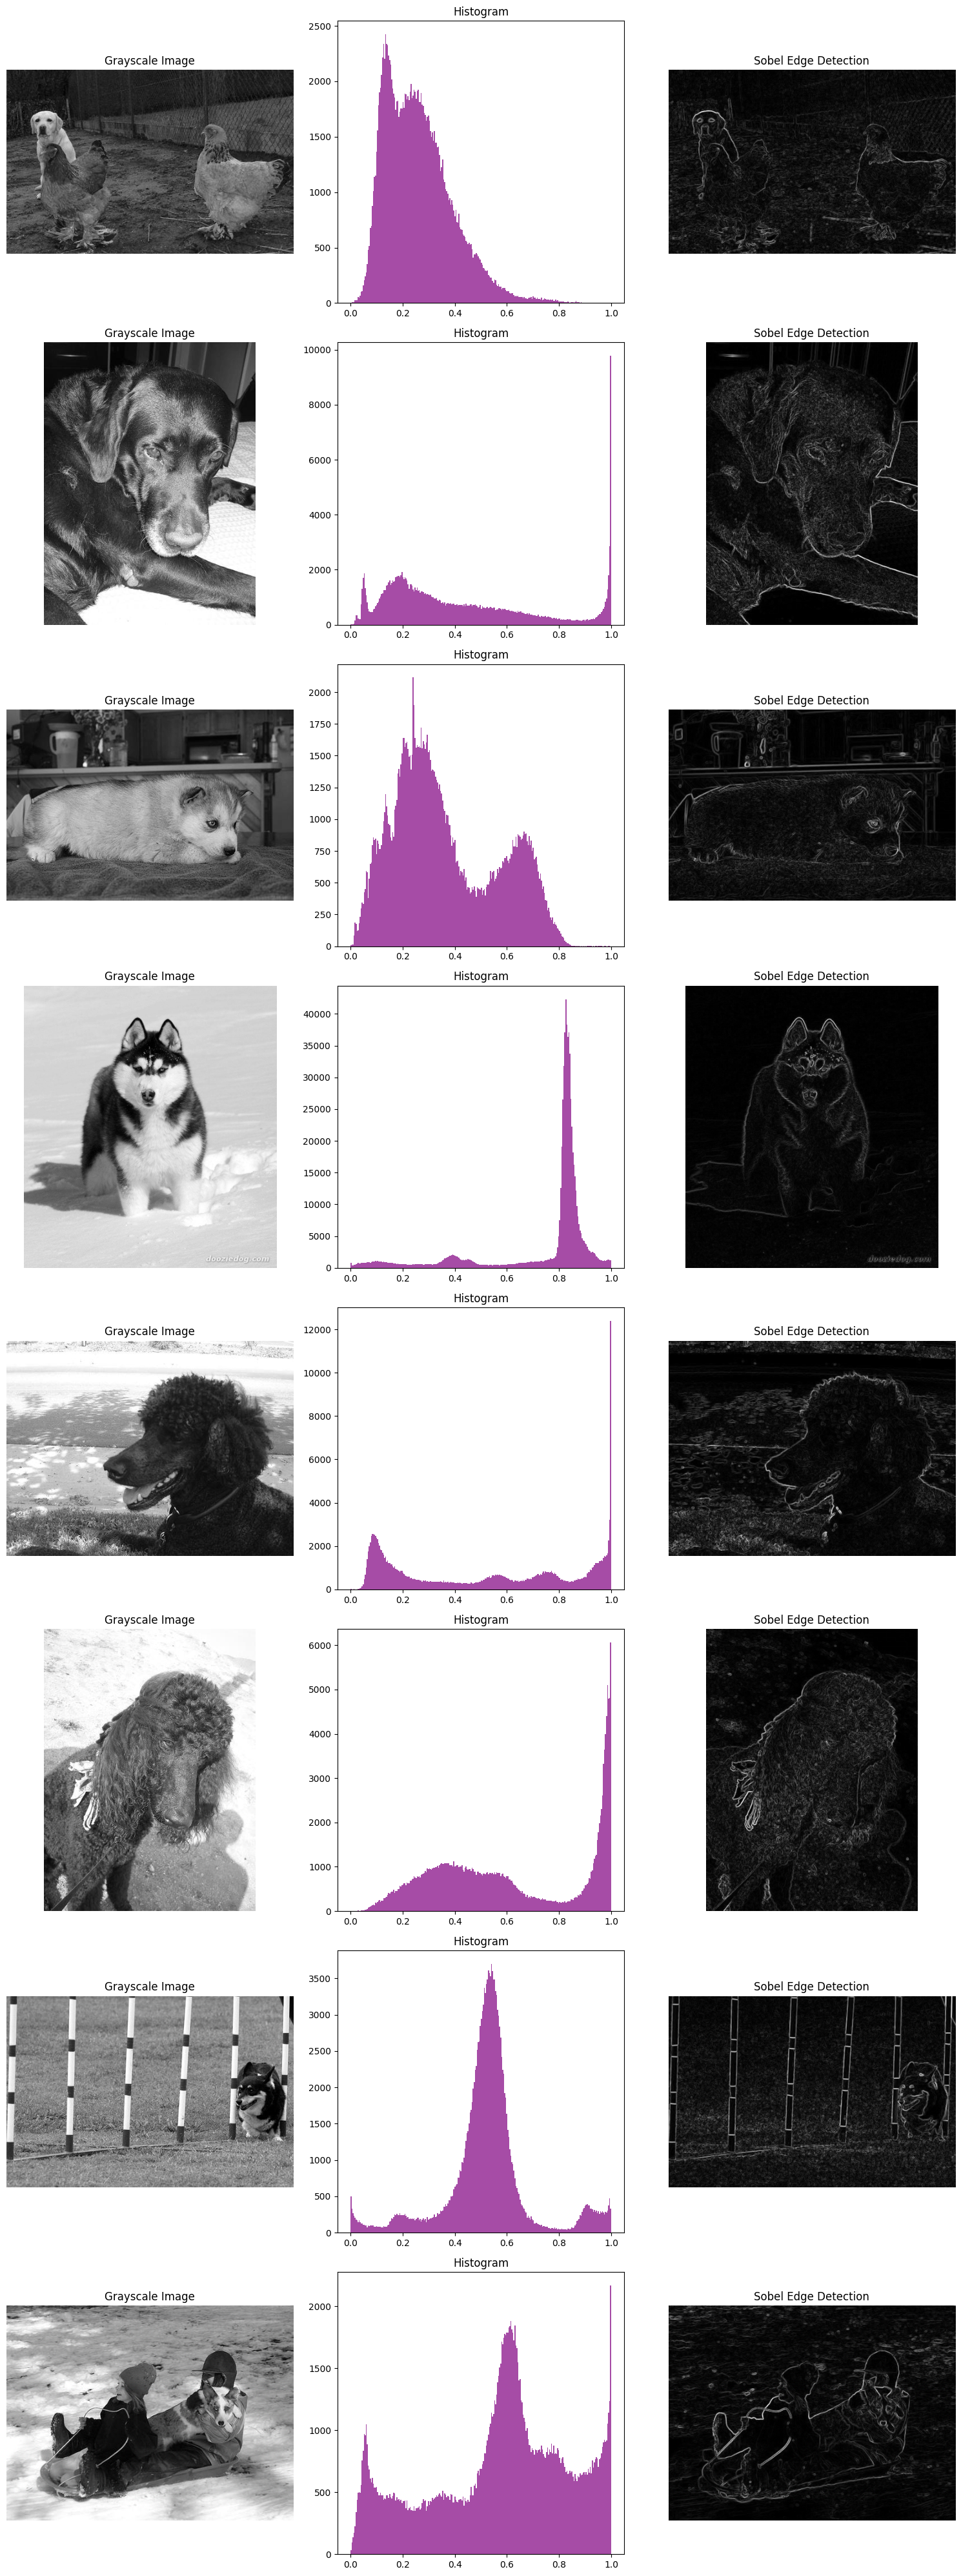

In [13]:
image_proecess = ImageProcess()
image_proecess.show_results()

## 2c>

In [7]:
import os
from skimage import io, color, filters, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [8]:
class EdgeHistogramAnalysis:
    def __init__(self, all_images):
        self.all_paths = AllRequiredPaths()
        self.all_images = all_images

    def _angle(self, dx, dy):
        return np.mod(np.arctan2(dx, dy), np.pi)

    def show_result(self):
        imgs_subdir = self.all_paths.imgs_folder

        for catg, img_name in self.all_images:
            img_path = os.path.join(imgs_subdir, catg, img_name)
            img = io.imread(img_path)

            # grayscale image
            grayscale_img = color.rgb2gray(img)

            # edge orientation angles
            dx = filters.sobel_h(grayscale_img)
            dy = filters.sobel_v(grayscale_img)
            ang_img = self._angle(dx,dy)

            hist, hist_centers = exposure.histogram(ang_img, nbins=36, source_range="dtype")

            plt.figure(figsize=(10,4))
            plt.subplot(1,2,1)
            plt.imshow(grayscale_img, cmap="gray")
            plt.title(f"{catg}")
            plt.axis("off")

            plt.subplot(1,2,2)
            plt.bar(hist_centers, hist, width=0.1, align="center", color = "purple")
            plt.xlabel("Bins")
            plt.ylabel("Pixel Count")
            plt.title("Edge Orientation")

            plt.tight_layout()
            plt.show()
            
            
            
        
        
        

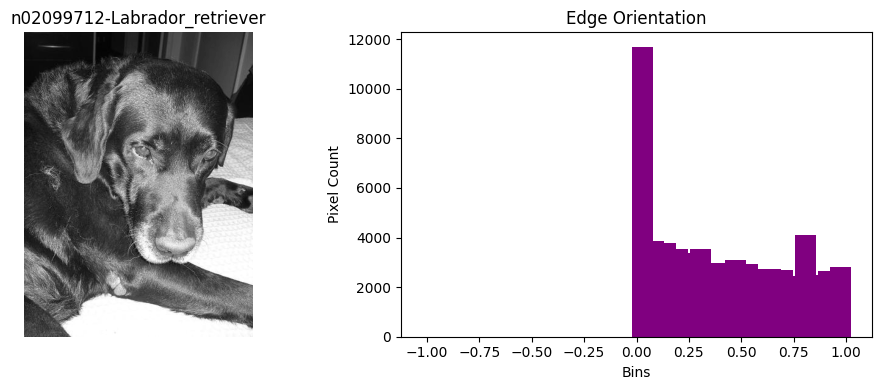

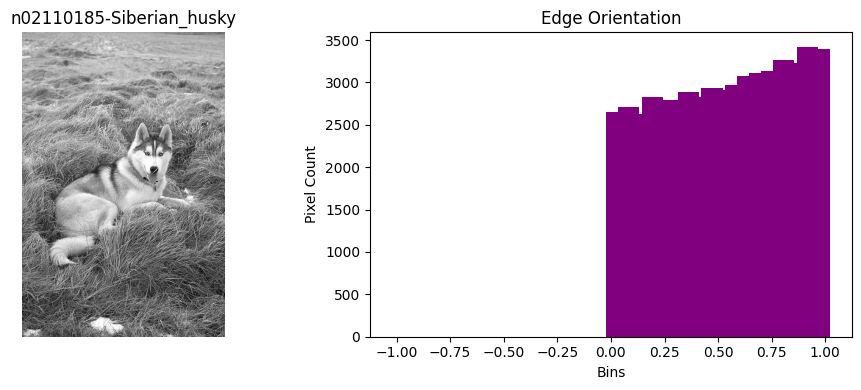

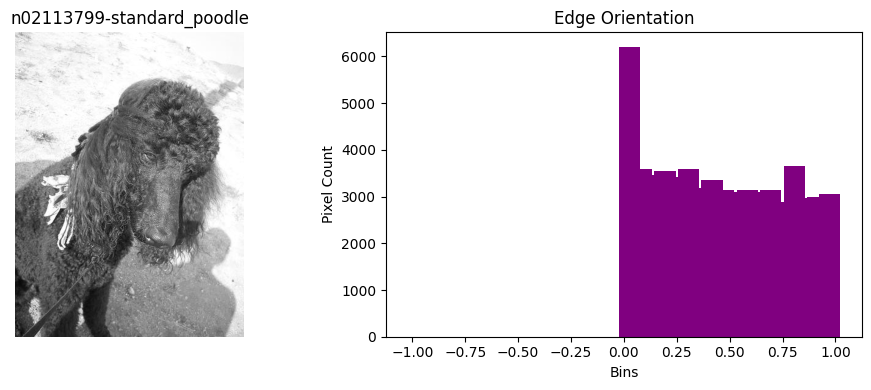

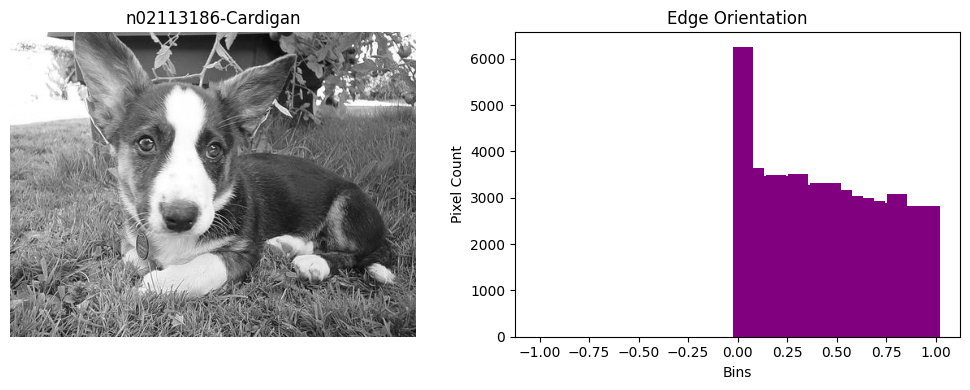

In [11]:
 selected_images = [
    ("n02099712-Labrador_retriever", "n02099712_129.jpg"),
    ("n02110185-Siberian_husky", "n02110185_10047.jpg"),
    ("n02113799-standard_poodle", "n02113799_1155.jpg"),
    ("n02113186-Cardigan", "n02113186_1030.jpg")
]

edge_hist = EdgeHistogramAnalysis(selected_images)
edge_hist.show_result()

## 2d>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, exposure
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances,cosine_distances

In [17]:
class HistorgramComparison:
    def __init__(self, selected_classes):
        self.all_paths = AllRequiredPaths()
        self.selected_classes = selected_classes

    def _angle(self, dx, dy):
        return np.mod(np.arctan2(dx,dy), np.pi)

    def _edge_histogram(self, image):
        gray_img = color.rgb2gray(image)
        angles = self._angle(filters.sobel_h(gray_img), filters.sobel_v(gray_img))
        hist, _ = np.histogram(angles, bins=36, range=(-np.pi, np.pi))
        return hist

    def _process_images(self):
        edge_hist = {}
        for catg, img_name in self.selected_classes:
            img_path = os.path.join(self.all_paths.imgs_folder, catg, img_name)
            img = io.imread(img_path)
            hist = self._edge_histogram(img)
            edge_hist[img_name] = hist
        return edge_hist

    def compare_hist(self, title):
        edge_hist = self._process_images()
        histos = list(edge_hist.values())
        img_names = list(edge_hist.keys())

        euclidean_dist = euclidean_distances(histos)
        manhattan_dist = manhattan_distances(histos)
        cosine_dist = cosine_distances(histos)

        print(title)
        for i in range(len(img_names)):
            for j in range(i + 1, len(img_names)):
                print(f"Euclidean: {euclidean_dist[i][j]}")
                print(f"Manhattan: {manhattan_dist[i][j]}")
                print(f"Cosine: {cosine_dist[i][j]}")


histogram_compare1 = HistorgramComparison([
    ("n02110185-Siberian_husky", "n02110185_10047.jpg"),
    ("n02110185-Siberian_husky", "n02110185_10844.jpg")
])
histogram_compare1.compare_hist("Comparison between two images of same class")

print("")
histogram_compare2 = HistorgramComparison([
    ("n02110185-Siberian_husky", "n02110185_10047.jpg"),
    ("n02113186-Cardigan", "n02113186_1030.jpg")
])
histogram_compare2.compare_hist("Comparison between two images of different class")


Comparison between two images of same class
Euclidean: 4678.233213511272
Manhattan: 16230.0
Cosine: 0.005141347337101587

Comparison between two images of different class
Euclidean: 10356.438383923307
Manhattan: 35606.0
Cosine: 0.024073880505602663


## 2e>

In [18]:
import matplotlib.pyplot as plt
from skimage import io, exposure
from skimage.transform import resize
from skimage.feature import hog

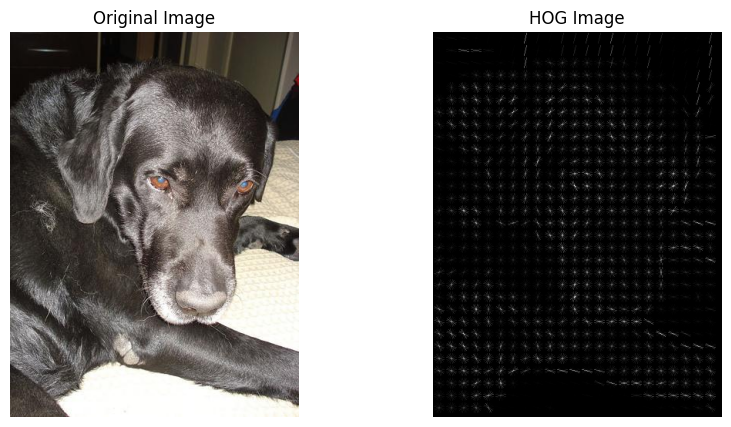

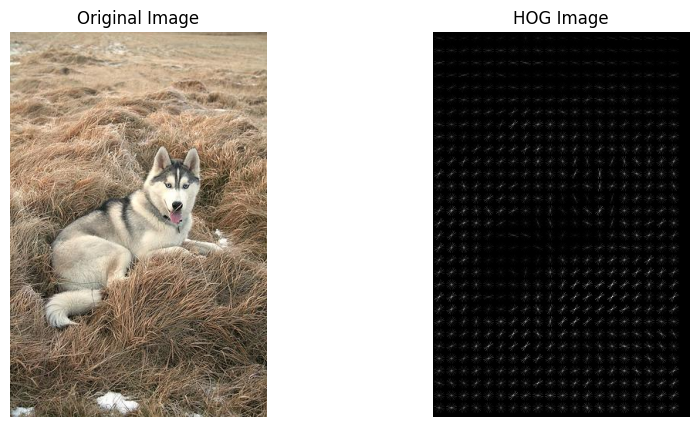

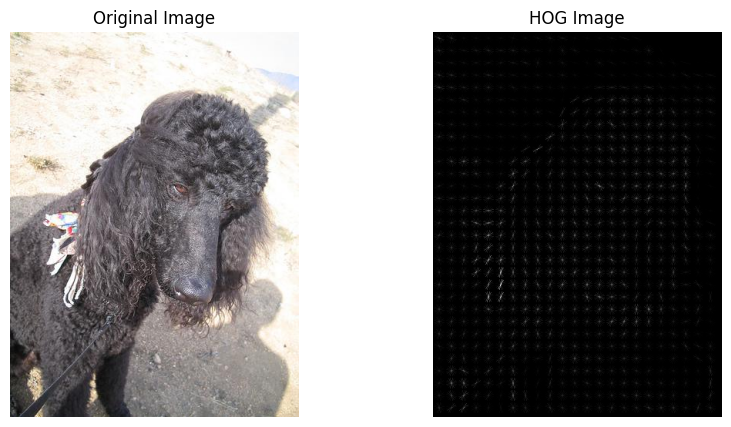

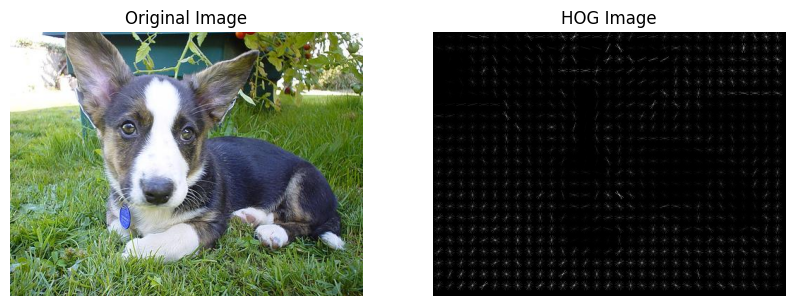

In [19]:
class HOGAnalysis:
    def __init__(self, images):
        self.all_path = AllRequiredPaths()
        self.images = images

    def _fetchAndPlot(self, img_path, orientations = 8, pixels_per_cell = (16,16), cells_per_block = (1,1)):
        img = io.imread(img_path)

        fd, hog_img = hog(img, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, visualize=True, channel_axis=-1)

        hog_img_rescaled = exposure.rescale_intensity(hog_img, out_range=(0,225))

        plt.figure(figsize=(10,5))

        plt.subplot(1,2,1)
        plt.imshow(img, cmap=plt.cm.gary if img.ndim == 2 else None)
        plt.title("Original Image")
        plt.axis('off')
        
        plt.subplot(1,2,2)
        plt.imshow(hog_img_rescaled, cmap="gray")
        plt.title("HOG Image")
        plt.axis('off')

        plt.show()

    def show_result(self):
        for catg, img_name in self.images:
            img_path = f"images/{catg}/{img_name}"
            self._fetchAndPlot(img_path)



images = [
    ("n02099712-Labrador_retriever", "n02099712_129.jpg"),
    ("n02110185-Siberian_husky", "n02110185_10047.jpg"),
    ("n02113799-standard_poodle", "n02113799_1155.jpg"),
    ("n02113186-Cardigan", "n02113186_1030.jpg")
]


hogAnalysis = HOGAnalysis(images)
hogAnalysis.show_result()

## 2f>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

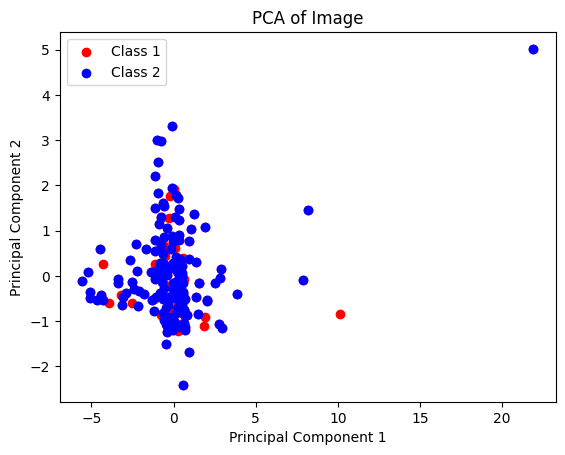

In [20]:
class PCAAnalysis:
    def __init__(self):
        self.all_paths = AllRequiredPaths()

    def _angle(self, dx, dy):
        return np.mod(np.arctan2(dx,dy), np.pi)
        
    def _edge_histogram(self, image):
        gray_img = color.rgb2gray(image)
        angles = self._angle(filters.sobel_h(gray_img), filters.sobel_v(gray_img))
        hist, _ = np.histogram(angles, bins=36, range=(-np.pi, np.pi))
        return hist

    def fetch_images(self, folder_name):
        allImage = []
        for img_name in os.listdir(folder_name):
            if img_name.lower().endswith(".jpg"):
                allImage.append(os.path.join(folder_name, img_name))
        return allImage

    def perform_pca_and_show_result(self, class1, class2):
        hists = []
        labels = []
        classes = class1 + class2

        for img_path in classes:
            img = io.imread(img_path)
            hist = self._edge_histogram(img)
            hists.append(hist)
            labels.append("Class 1" if img_path in class1 else "Class 2")

        histogram = np.array(hists)
        
        std_scalar = StandardScaler()
        hist_std = std_scalar.fit_transform(histogram)

        pca = PCA(n_components=2)
        hist_pca = pca.fit_transform(hist_std)

        pca1 = hist_pca[:len(class1)]
        pca2 = hist_pca[:len(class2)]

        plt.scatter(pca1[:, 0], pca1[:, 1], color = "red", label = "Class-1")
        plt.scatter(pca2[:, 0], pca2[:, 1], color = "blue", label = "Class-2")

        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.legend(["Class 1", "Class 2"])
        plt.title("PCA of Image")
        plt.show()


pca_analysis = PCAAnalysis()
pca1_folder = pca_analysis.fetch_images("images/n02110185-Siberian_husky")
pca2_folder = pca_analysis.fetch_images("images/n02113186-Cardigan")

pca_analysis.perform_pca_and_show_result(pca1_folder, pca2_folder)